# 랜덤 포레스트(Random Forest)를 이용한 데이터 분석

- Random forest 는 Decision Tree의 단점을 개선하기 위한 알고리즘 중 하나
- Decision Tree의 확장
- Random Forest는 훌륭한 데이터 분석 알고리즘 중 하나
    - 데이터 분류
    - 데이터 군집
    - Feature의 중요성 확인
    - 데이터 예측
    
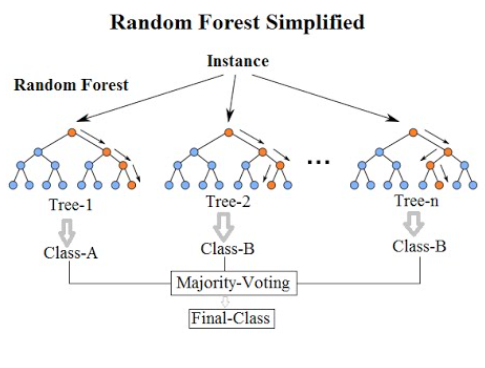

## 랜덤포레스트 예측 모듈

1) Dataset에서 샘플 데이터를 선택 (Bagging, Bootstrap Aggregation)
2) 샘플 데이터를 이용해 Decision Tree 생성
3) 1,2 번을 n번 반복
4) 3을 통해 생성한 n개의 Decision Tree를 이용해 예측
5) 예측 결과에서 가장 많이 등장하는 결과를 선택하여 최종 결과로 선택


## 랜덤포레스트 예측 예

1. Test Data의 target은 A or B
2. Test Data의 target 예측
3. 4개의 Tree에서 예측 결과가 'A'
4. 최종결과가 Test Data를 A로 예측

## 랜덤포레스트 특징

- 여러개 Decision Tree를 결합함으로써 단일 Decision Tree의 결점을 극복
- Over-Fitting 문제가 적음
- 구현이 간단함
- 병렬계산이 간단함


## 랜덤포레스트에서의 2가지 Random

- Data set에서 샘플 데이터를 random으로 선택
    1) 랜덤으로 n개의 데이터 선택
    2) 선택한 n개의 데이터는 중복 가능
    3) 선택한 t개의 샘플 데이터 사이 데이터 중복 가능
    4) 선택한 샘플데이터로 Decision Tree 생성
- 샘플 데이터에서 feature를 random으로 선택해 Decision Tree 생성
    - 선택한 feature의 개수는 sqrt(전체 feature 수), log2(전체 feature 수)등 방법으로 계산
    
    
    
## 자기 성능 평가

- Bagging
    - 63%의 데이터를 이용해 각각의 트리를 생성
    - 나머지 37%의 데이터를 이용해 각각의 트리의 성능을 평가
    - 각각의 트리에 입력하는 데이터는 다름
    
- Out-of-Bag (OOB)
    - OOB 데이터를 이용해 tree의 성능을 교정 
    - OOB는 성능통계에서 많이 사용됨
        * Bagging을 통해서는 각 Bootstrap을 하며 복원추출에 뽑히지 않은 데이터들(보통 2/3정도가 뽑힌다고 한다.)이 자동으로 validation set이 되어 Cross-validation을 하지 않아도 test error를 추정할 수 있다. 이 뽑히지 않은 데이터를 Out-of-bag(OOB)이라 부른다.

## Iris 데이터를 이용한 간단한 랜덤포레스트

- iris 데이터는 붓꽃의 세가지 종류를 기록한 데이터
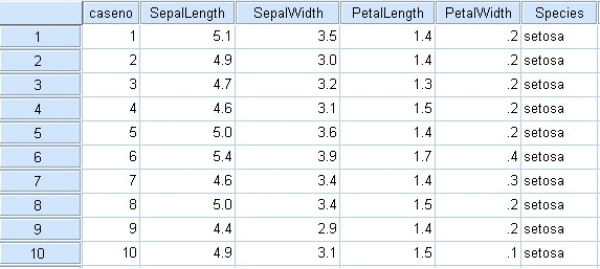

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

/Users/eastone/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/eastone/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/eastone/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
# Train, Test set 설정

iris = load_iris()

x_train = iris.data[:-30]
y_train = iris.target[:-30]

x_test = iris.data[-30:]
y_test = iris.target[-30:]

In [4]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

위의 방식으로 Train, Test 데이터셋을 나눌 경우 위처럼 test 셋이 전부 2로 합리적으로 분리되지 않았다는 것을 판단할 수 있음

In [6]:
#랜덤포레스트 모듈 import
from sklearn.ensemble import RandomForestClassifier

#tree의 개수 Random Forest 분류 모듈 생성

rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
rfc.fit(x_train,y_train)
prediction = rfc.predict(x_test)
#예측값과 실제값 비교
print(prediction==y_test)

[ True False  True  True  True  True False False  True  True  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [8]:
#Random Forest 정확도 측정
rfc.score(x_test,y_test)

0.8

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy is : ', accuracy_score(prediction,y_test))
print('========================================================================')
print(classification_report(prediction,y_test))

Accuracy is :  0.8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.80      1.00      0.89        24

   micro avg       0.80      0.80      0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



/Users/eastone/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


위에서 Train, Test 셋의 분리가 제대로 이루어지지 않았기 때문에 분류성능이 올바르게 나오지 않음. 데이터셋을 재 분리하여 모델이용

In [11]:
from sklearn.model_selection import train_test_split

x= iris.data
y= iris.target

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

y_test

array([1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0])

In [12]:
#Tree의 개수가 10개인 랜덤포레스트를 생성하고 clf에 저장
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
prediction_1 = clf.predict(X_test)
print('Accuracy is : ', accuracy_score(prediction_1,y_test))
print('========================================================================')
print(classification_report(prediction_1,y_test))

Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



위에서 실시한 모델보다 훨씬 성능이 좋게 나오는 것을 확인할 수 있다

### 랜덤포레스트 분류 성능 높이는 방법

- 트리의 개수를 확장한다.
    - 하지만 트리의 개수가 일정 개수를 넘어가면 성능이 낮아질 수 있음
- max_feature 설정

In [15]:
clf_2 = RandomForestClassifier(n_estimators=200,
                              max_features=4,
                              oob_score=True)

clf_2.fit(X_train,y_train)
prediction_2 = clf_2.predict(X_test)
print('Accuracy is : ', accuracy_score(prediction_2,y_test))
print('========================================================================')
print(classification_report(prediction_2,y_test))

Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



iris데이터 셋이 간단하고 size가 적기 때문에 성능의 차이가 크게 보이지는 않음

### 각 feature의 중요도 확인


In [16]:
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.010353486117319153
sepal width (cm) 0.004359242059568017
petal length (cm) 0.44669616669913453
petal width (cm) 0.538591105123978


Petal width 가 가장 중요도가 높은 변수라는 것을 알 수 있다.